# Análisis inicial del conjunto de datos


In [1]:
from transformacion_datos import *

# Parametros
atributos = ['R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'Temperature', 'Humidity']
funciones_agregacion = ['min', 'max', 'sum', 'mean', 'median', 'std', 'var', 'sem']

# Obtener array de numpy
df_datos = leer_conjunto_datos(DATA_DEFAULT_PATH)
df_metadatos = leer_conjunto_datos(METADATA_DEFAULT_PATH)
df_join = juntar_datos_metadatos(df_datos, df_metadatos)
df_join = eliminar_metadata_sobrante(filtrar_fuera_induccion(df_join))
df_res = agrupar_datos(df_join, agg_funcs=funciones_agregacion)

# Obtener como array numpy, cuyas columnas originales tienen la descripción cols
X, y = transformacion_numpy(df_res)
cols = [atr + '_' + agg_func for atr in atributos for agg_func in funciones_agregacion]

In [2]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np

grid_search(X, y, 0.25, ['precision', 'recall'], DecisionTreeClassifier,
            {
                'splitter': ['best'],
                'max_depth': [None] + list(range(2, 10)),
                'min_samples_split': list(range(2, 10)),
                'min_samples_leaf': list(range(1, 5)),
                'min_weight_fraction_leaf': [0.0, 0.1, 0.2],
                'max_features': [None, 10, 12, 15, 17, 20],
                'max_leaf_nodes': [None],
                'min_impurity_decrease': [0.0, 0.1, 0.2],
                'ccp_alpha': [0.0, 0.05, 0.1]
            })

# Tuning hyper-parameters for precision



KeyboardInterrupt: 

0.8416666666666667


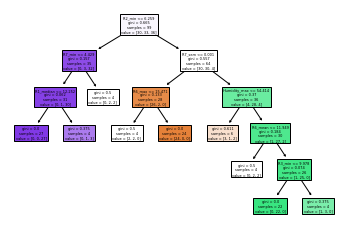

In [22]:

# K-fold score: 0.8416666666666667
clf = DecisionTreeClassifier(**{'ccp_alpha': 0.0, 'max_depth': 7, 'max_leaf_nodes': None, 'min_samples_leaf': 4, 'min_samples_split': 8, 'splitter': 'best'})

# K-fold score: 0.756
# clf = DecisionTreeClassifier(**{'max_depth': 9, 'max_features': 17, 'max_leaf_nodes': None, 'min_samples_leaf': 4, 'min_samples_split': 6, 'splitter': 'best'})

# K-fold score: 0.7805555555555556
# clf = DecisionTreeClassifier(**{'max_depth': 2, 'max_features': 10, 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'best'})

# K-fold score: 0.825
# clf = DecisionTreeClassifier(**{'ccp_alpha': 0.1, 'max_depth': None, 'max_features': 15, 'max_leaf_nodes': None, 'min_samples_leaf': 4, 'min_samples_split': 6, 'min_weight_fraction_leaf': 0.1, 'splitter': 'best'})

# K-fold score: 0.756
# clf = DecisionTreeClassifier(**{'ccp_alpha': 0.05, 'max_depth': 5, 'max_features': 12, 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_samples_split': 4, 'min_weight_fraction_leaf': 0.0, 'splitter': 'best'})

# K-fold score: 0.74
# clf = DecisionTreeClassifier(**{'ccp_alpha': 0.0, 'max_depth': 8, 'max_features': 15, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.1, 'min_samples_leaf': 3, 'min_samples_split': 9, 'min_weight_fraction_leaf': 0.0, 'splitter': 'best'})

# K-fold score: 0.7777777777777778
# clf = DecisionTreeClassifier(**{'ccp_alpha': 0.1, 'max_depth': 6, 'max_features': 20, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.1, 'min_samples_leaf': 3, 'min_samples_split': 4, 'min_weight_fraction_leaf': 0.2, 'splitter': 'best'})

print(np.mean(cross_val_score(clf, X, y, cv=30)))
clf.fit(X, y)
plt.figure()
plot_tree(clf, filled=True, feature_names=cols)
plt.show()

In [4]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
import sklearn
import matplotlib.pyplot as plt
import numpy as np

single_hidden_layer_sizes = [(i,) for i in range(100, 201, 10)]
double_hidden_layer_sizes = [(i, j) for i in range(100, 201, 10) for j in range(100, 201, 10)]

grid_search(X, y, 0.25, ['precision', 'recall'], MLPClassifier,
            {
                'hidden_layer_sizes': single_hidden_layer_sizes + double_hidden_layer_sizes,
                'activation': ['logistic', 'relu'],
            })

# Tuning hyper-parameters for precision



KeyboardInterrupt: 

In [6]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score

# Mas neuronas es mejor, hasta cierto punto...

# K-fold score: 0.44
# clf = MLPClassifier(**{'hidden_layer_sizes': (30, 30)})

# K-fold score: 0.5333333333333333 
# clf = MLPClassifier(**{'hidden_layer_sizes': (100, 70)})

# K-fold score: 0.5333333333333333 
# clf = MLPClassifier(**{'hidden_layer_sizes': (100, 70)})

# K-fold score: 0.5777777777777777
# clf = MLPClassifier(**{'hidden_layer_sizes': (60, 100)})

# K-fold score: 0.6249999999999999 
# clf = MLPClassifier(**{'hidden_layer_sizes': (130, 190)})

# K-fold score: 0.6722222222222223
# clf = MLPClassifier(**{'hidden_layer_sizes': (110, 160)})

# K-fold score: 0.6138888888888888
clf = MLPClassifier(**{'hidden_layer_sizes': (300, 300)})

print(np.mean(cross_val_score(clf, X, y, cv=30)))

0.6138888888888888
